# Matrix plots and Grids

## Matrix Plots

Matrix plots are useful to plot data as color-encoded matrices and can also be used to indicate clusters within the data

In [9]:
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, the data should already be in a matrix form, the sns.heatmap function basically colors the data.

In [7]:
tips.corr()

# Matrix form for correlation 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


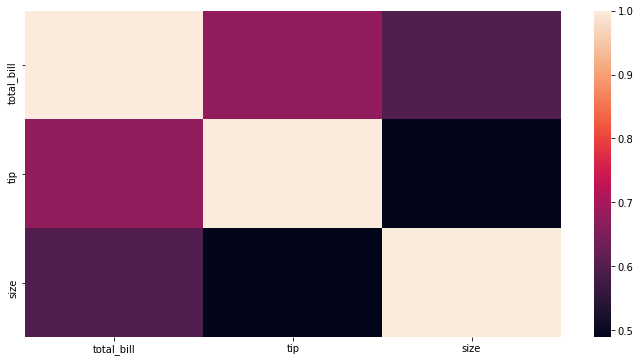

In [10]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(tips.corr())

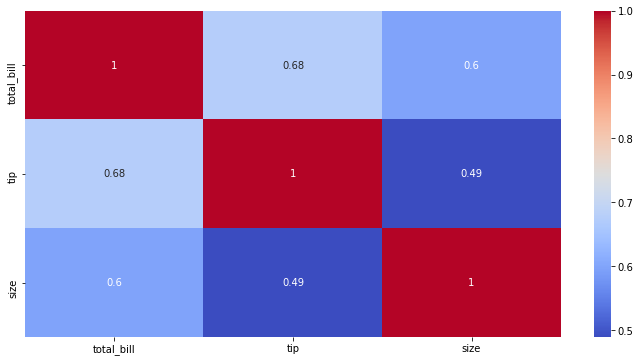

In [11]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [12]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


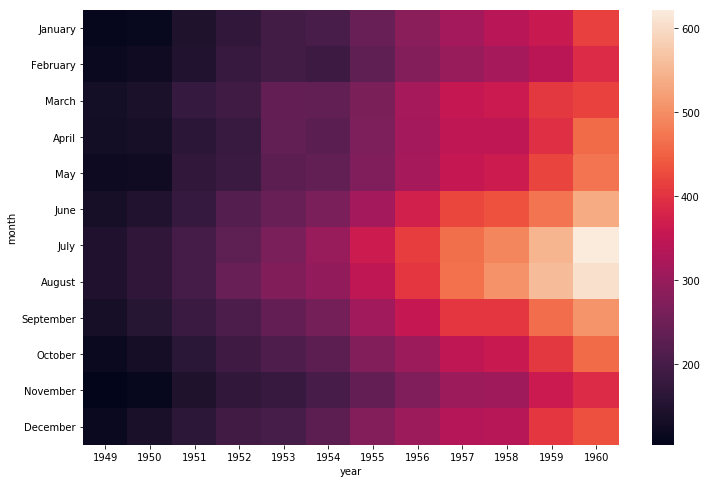

In [15]:
fig = plt.figure(figsize=(12, 8))
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

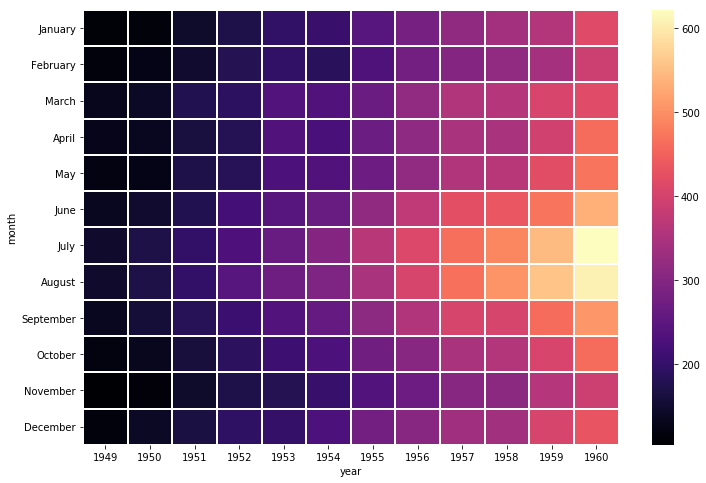

In [16]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

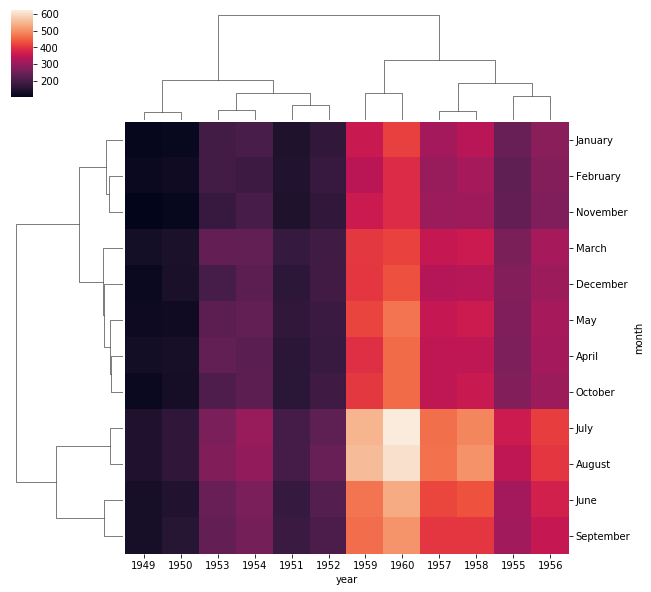

In [17]:
sns.clustermap(pvflights)

The years and months are no longer in order, instead they are grouped by similarity in value (passenger count). We can begin to infer things from this plot, such as August and July (1960) (summer travel months)

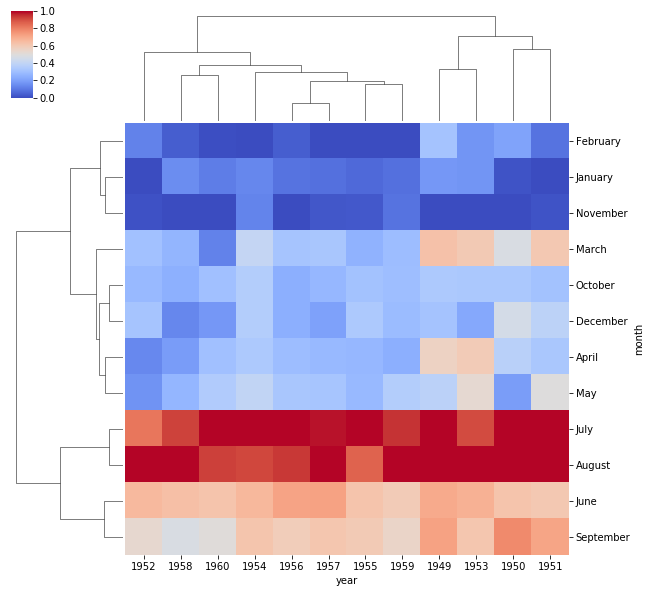

In [20]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

Grids are general types of plots used to map plot types to rows and columns of a grid, this helps to create similar plots separated by features.

In [21]:
iris = sns.load_dataset('iris')

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

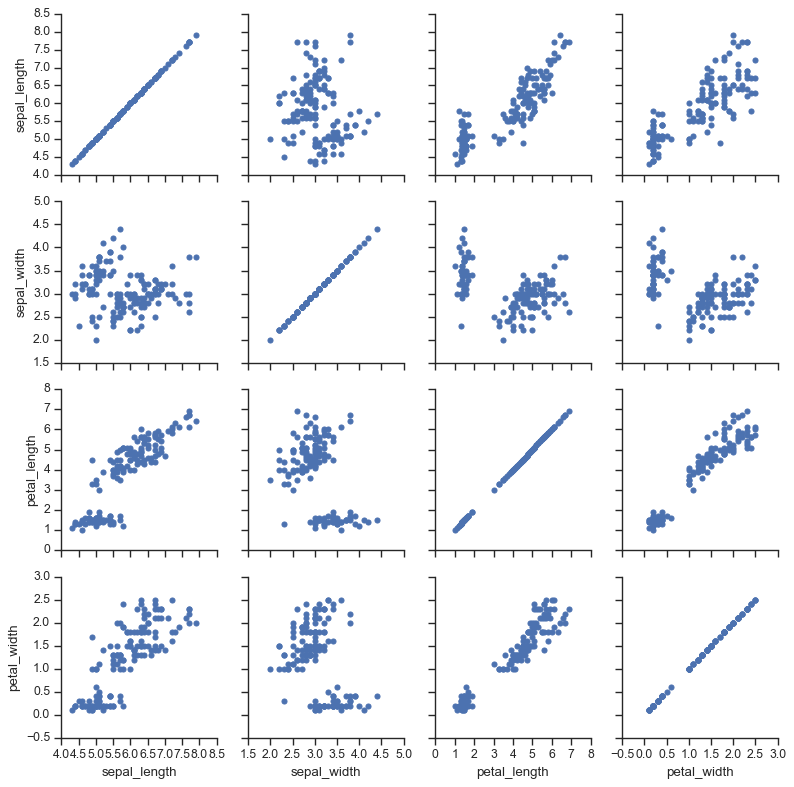

In [46]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

## pairplot

pairplot is a simpler version of PairGrid 

/Users/kirandarshak/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


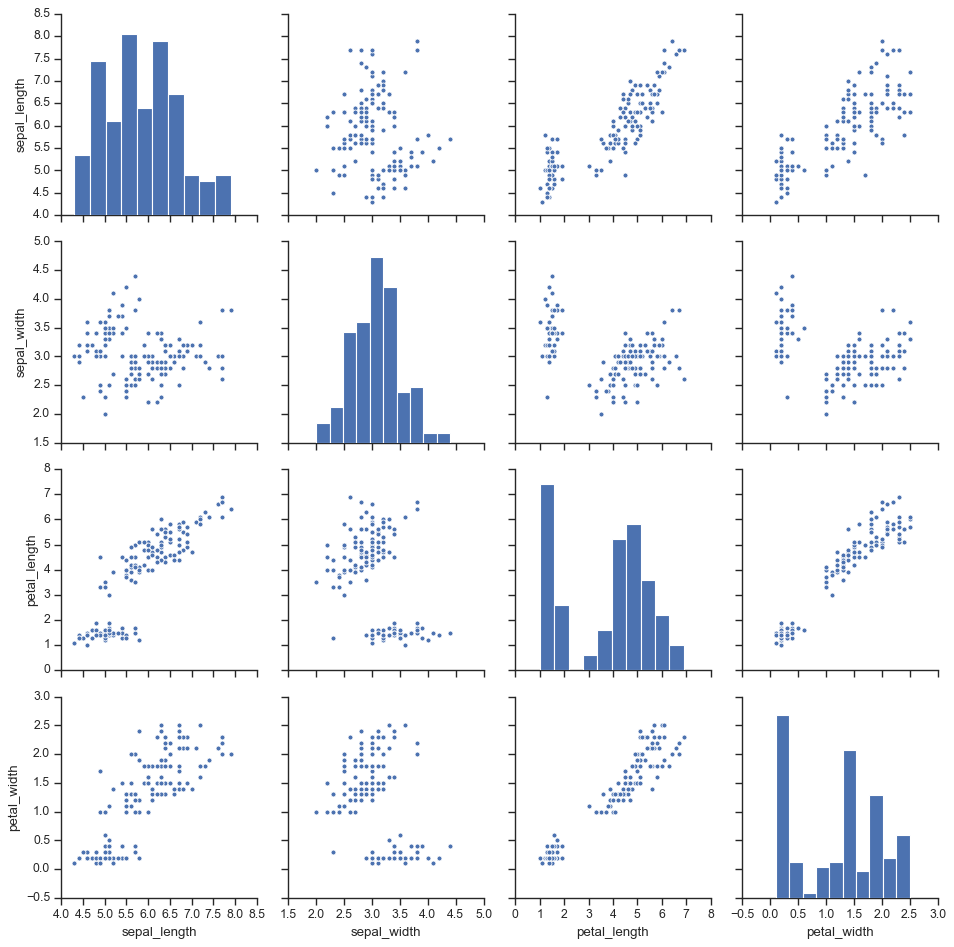

In [62]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(iris,size =3)


/Users/kirandarshak/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


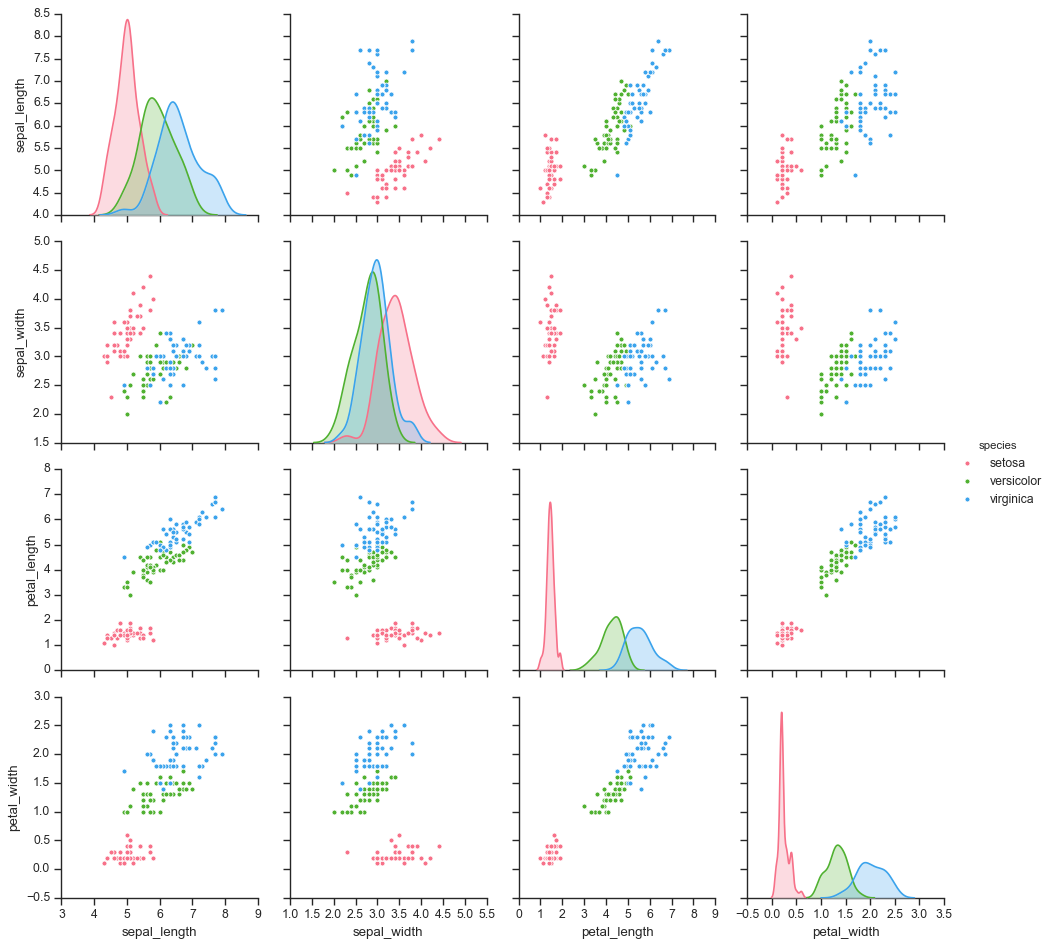

In [63]:
sns.pairplot(iris,size=3,hue='species',palette='husl')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

/Users/kirandarshak/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


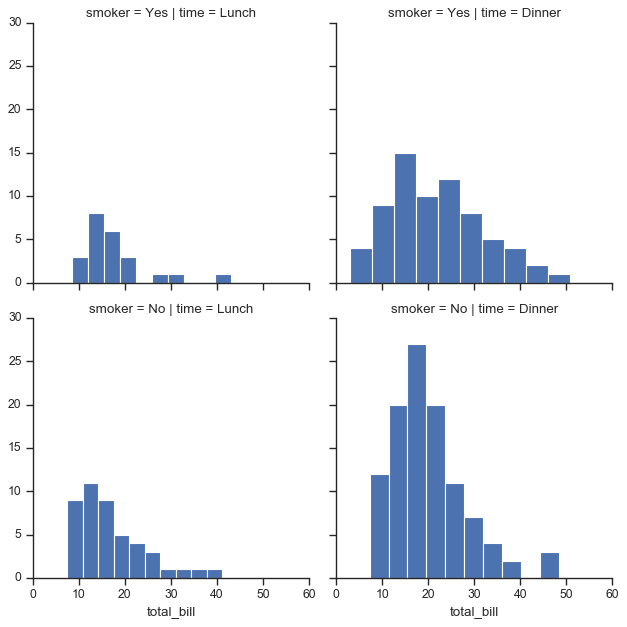

In [58]:
g = sns.FacetGrid(tips, size=4, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

/Users/kirandarshak/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 960x640 with 0 Axes>

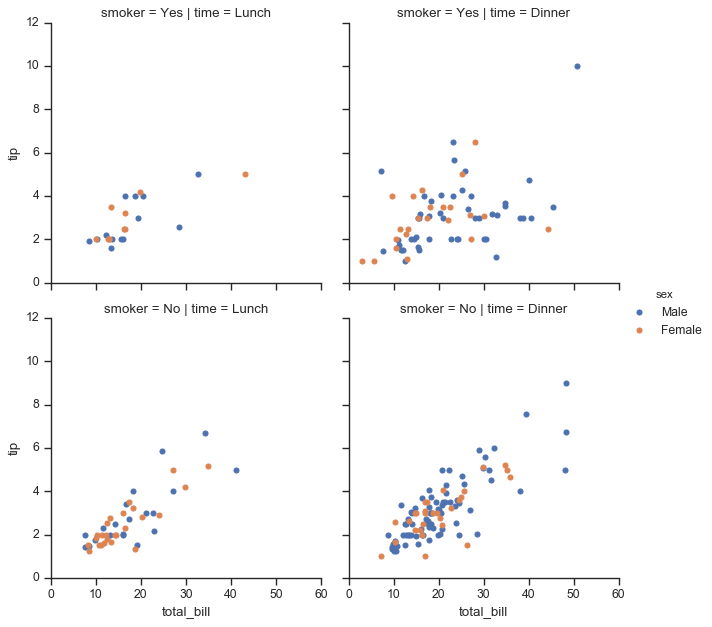

In [57]:
fig = plt.figure(figsize=(12, 8))
g = sns.FacetGrid(tips, col="time", size=4, row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids

/Users/kirandarshak/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


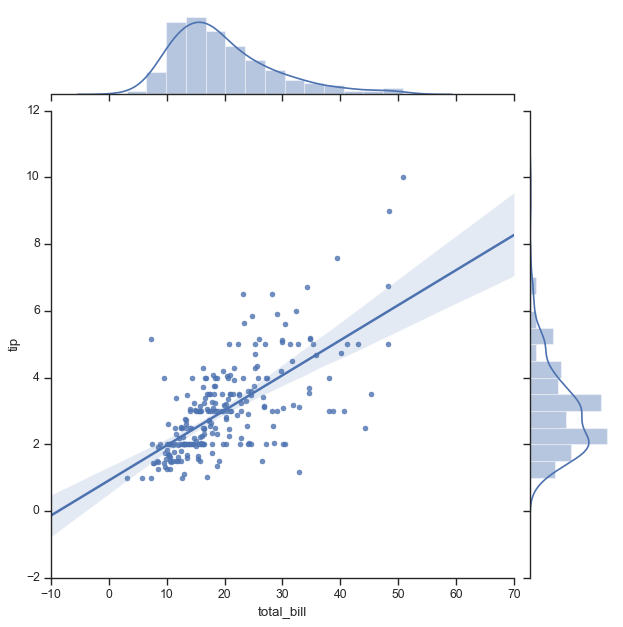

In [76]:
g = sns.JointGrid(size=8, x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)